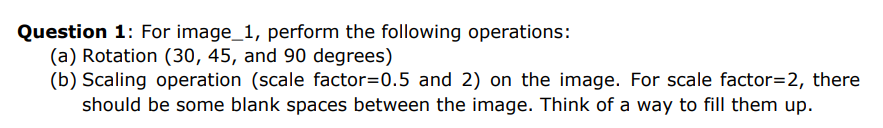

In [2]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import math
import numpy as np

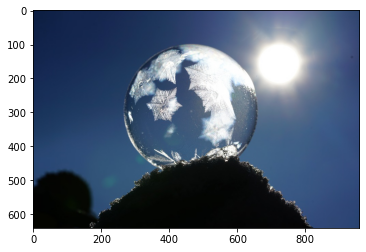

In [3]:
Img1cv= cv2.imread("image_1.jpg")

Img1cv=cv2.cvtColor(Img1cv,cv2.COLOR_BGR2RGB)
plt.imshow(Img1cv,cmap='gray')
plt.show();

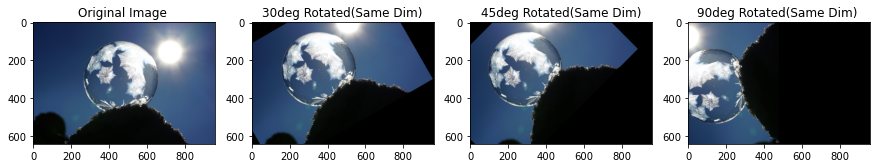

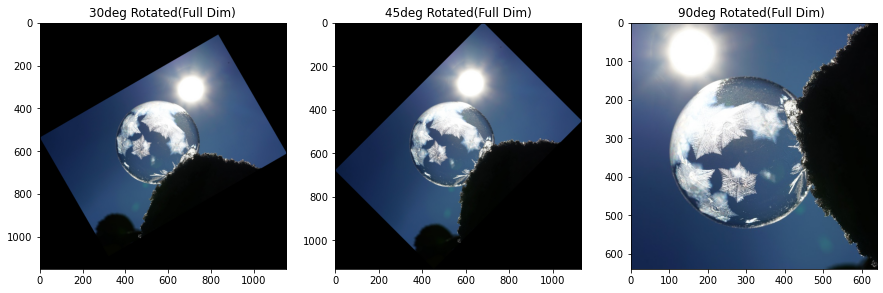

In [4]:
# Question (a) 



def image_rotate(image, degrees, option='same'):
    '''
    This function rotates the image around its center by amount of degrees
    provided. The rotated image can be of the same size as the original image
    or it can show the full image.

    '''
    # First we will convert the degrees into radians
    rads = math.radians(degrees)
    # Finding the center point of the original image
    cx, cy = (image.shape[1]//2, image.shape[0]//2)
    
    if(option!='same'):
        # Let us find the height and width of the rotated image
        height_rot_img = round(abs(image.shape[0]*math.sin(rads))) + \
                           round(abs(image.shape[1]*math.cos(rads)))
        width_rot_img = round(abs(image.shape[1]*math.cos(rads))) + \
                           round(abs(image.shape[0]*math.sin(rads)))
        rot_img = np.uint8(np.zeros((height_rot_img,width_rot_img,image.shape[2])))
        # Finding the center point of rotated image.
        midx,midy = (width_rot_img//2, height_rot_img//2)
    else:
        rot_img = np.uint8(np.zeros(image.shape))
     
    for i in range(rot_img.shape[0]):
        for j in range(rot_img.shape[1]):
            if(option!='same'):
                x= (i-midx)*math.cos(rads)+(j-midy)*math.sin(rads)
                y= -(i-midx)*math.sin(rads)+(j-midy)*math.cos(rads)
                x=round(x)+cy
                y=round(y)+cx
            else:
                x= (i-cx)*math.cos(rads)+(j-cy)*math.sin(rads)
                y= -(i-cx)*math.sin(rads)+(j-cy)*math.cos(rads)
                x=round(x)+cx
                y=round(y)+cy

            if (x>=0 and y>=0 and x<image.shape[0] and  y<image.shape[1]):
                rot_img[i,j,:] = image[x,y,:]
    return rot_img 





fig, axs = plt.subplots(1, 4,figsize=(15, 15))
axs[0].imshow(Img1cv, cmap = 'gray')
axs[0].set_title('Original Image ')
axs[1].imshow(image_rotate(Img1cv,30) , cmap = 'gray')
axs[1].set_title('30deg Rotated(Same Dim)')
axs[2].imshow(image_rotate(Img1cv,45)  , cmap = 'gray')
axs[2].set_title('45deg Rotated(Same Dim)')
axs[3].set_title('90deg Rotated(Same Dim) ')
axs[3].imshow(image_rotate(Img1cv,90)  , cmap = 'gray')


fig, axs = plt.subplots(1, 3,figsize=(15, 15))
axs[0].imshow(image_rotate(Img1cv,30,option='full') , cmap = 'gray')
axs[0].set_title('30deg Rotated(Full Dim)')
axs[1].imshow(image_rotate(Img1cv,45,option='full')  , cmap = 'gray')
axs[1].set_title('45deg Rotated(Full Dim)')
axs[2].set_title('90deg Rotated(Full Dim) ')
axs[2].imshow(image_rotate(Img1cv,90,option='full')  , cmap = 'gray')
plt.show()

## Scalling the image 

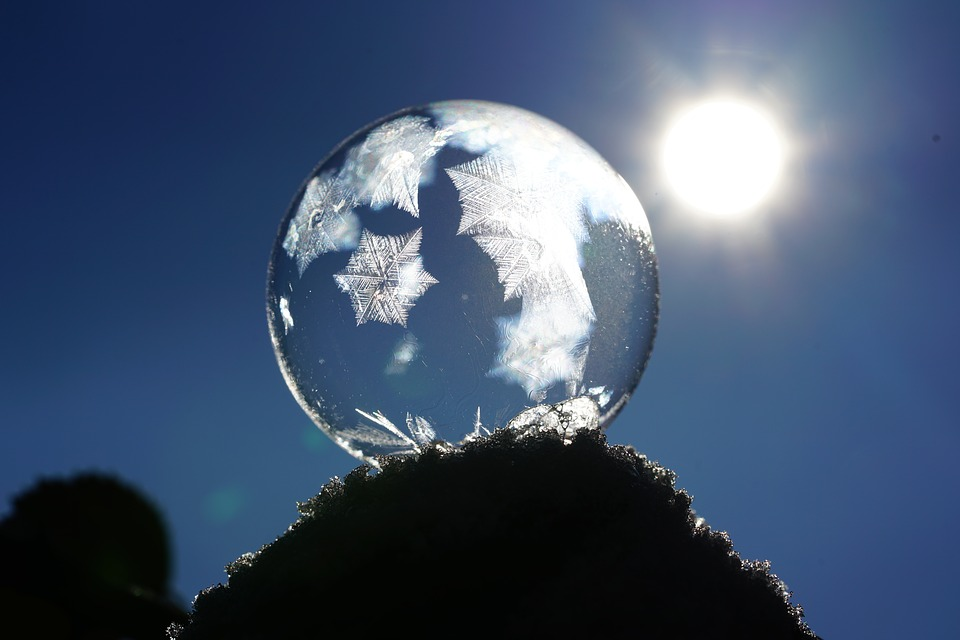

In [5]:
# Question (b) 

Img1PIL=Image.open("image_1.jpg")
Img1PIL

###  Scale the image by a factor of 0.5

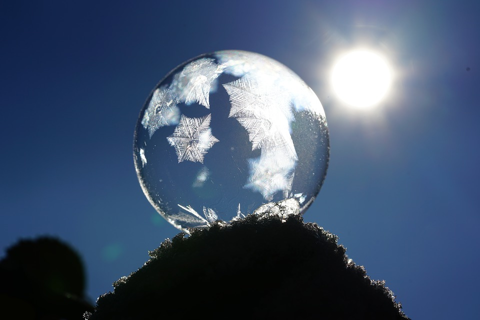

In [6]:

width,height=Img1PIL.size
new_width = int(width * 0.5)
new_height = int(height * 0.5)  
scaled_image = Img1PIL.resize((new_width, new_height))

# Save the scaled image
scaled_image.save('scaled_image.jpg')
scaled_image

### Scale the image by a factor of 2

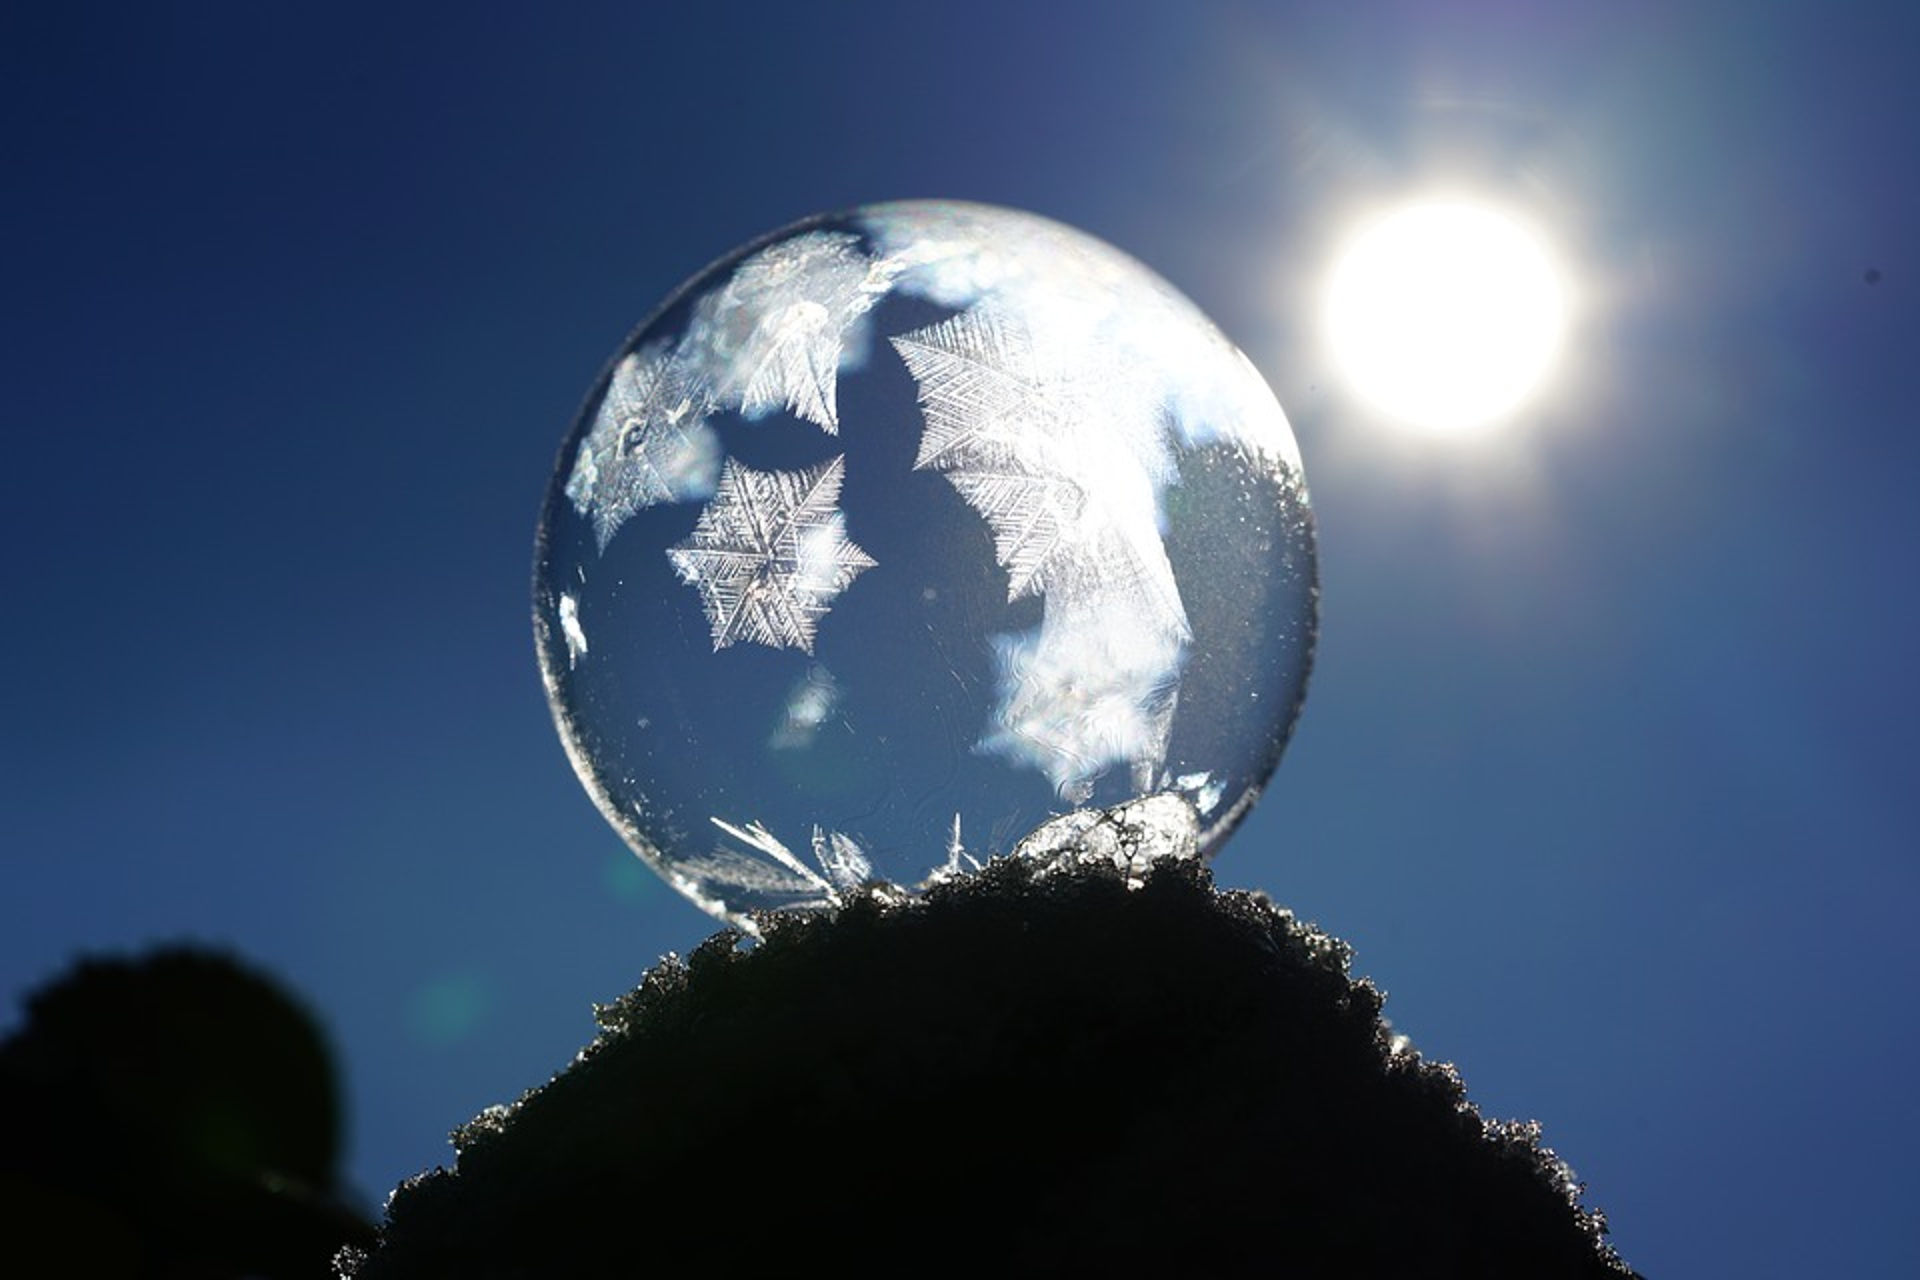

In [7]:
width,height=Img1PIL.size
new_width = int(width * 2)
new_height = int(height * 2)  
scaled_image = Img1PIL.resize((new_width, new_height))#, resample=Image.BICUBIC)

# Save the scaled image
scaled_image.save('scaled_image.jpg')
scaled_image

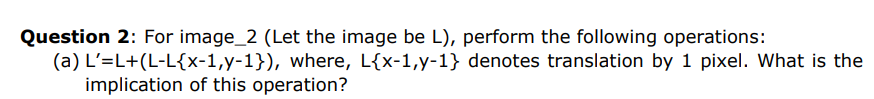

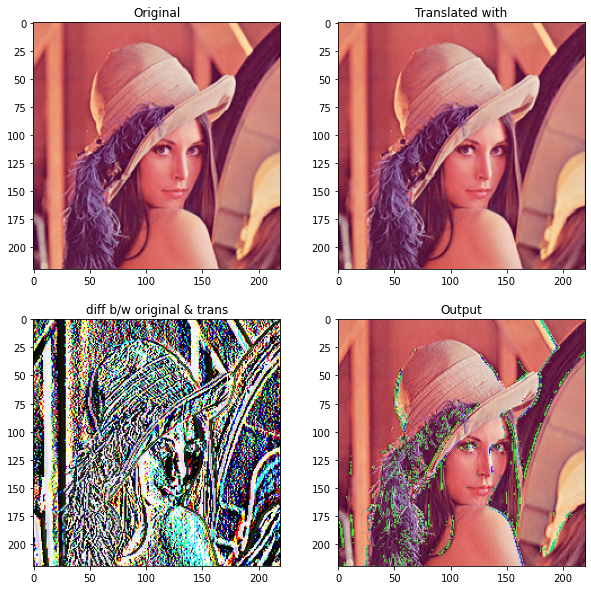

In [176]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
 
def translation(image,t):           #image in pil format and t = @ of pixel translation
    
    # Convert the image to a NumPy array
    img_array = np.array(img)
    # Get the image dimensions
    height, width, channels = img_array.shape

    # Create a new array to hold the translated image
    translated_array = np.zeros_like(img_array)
    
    # Loop over each pixel in the translated image
    for y in range(height):
        for x in range(width):
            # Compute the translated pixel position
            new_x = x + t

            # Check if the new pixel position is within bounds
            if new_x < width:
                # Copy the pixel value to the new position
                translated_array[y, new_x, :] = img_array[y, x, :]

    # Convert the translated array back to an image
    translated_img = Image.fromarray(translated_array)
    
    # Substracting 2 image 
    diff_array = img_array - translated_array
    
    # Convert the difference array back to a PIL Image object
    diff_img = Image.fromarray(diff_array)
    
    # Adding 2 image 
    add_array = diff_array + img_array
    
    # Convert the difference array back to a PIL Image object
    add_img = Image.fromarray(add_array)
    
    
    # Display the original and translated images side by side
    fig, ax = plt.subplots(2, 2,figsize=(10, 10))
    ax[0,0].imshow(img)
    ax[0,0].set_title('Original')
    ax[0,1].imshow(translated_img)
    ax[0,1].set_title('Translated with' )
    ax[1,0].imshow(diff_img)
    ax[1,0].set_title("diff b/w original & trans")
    ax[1,1].imshow(add_img)
    ax[1,1].set_title("Output")
    plt.show()
    
    return translated_img


    
# Load the image
img = Image.open("image_2.png")    
img_t=translation(img,t=-1)




In [ ]:
# Load the first image
img1 = Image.open('image1.png')

# Load the second image
img2 = Image.open(img_t)

# Convert both images to NumPy arrays
img1_array = np.array(img1)
img2_array = np.array(img2)

# Subtract the second image from the first image
diff_array = img1_array - img2_array

# Convert the difference array back to a PIL Image object
diff_img = Image.fromarray(diff_array)

# Save the difference image to a file
diff_img.save('diff.png')


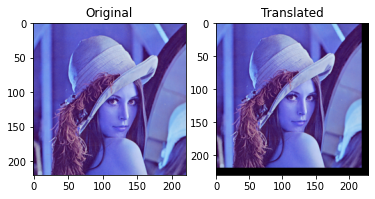

In [167]:
# Using cv2


def translation_cv2(image,t):
    #Translation matrix
    matrix = np.float32([[1,0,t],[0,1,t]])
    
    #Applying the matrix to the image 
    translated = cv2.warpAffine(image, matrix, (image.shape[1]+10,image.shape[0]+10))
    
    
    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(image,cmap="gray")
    ax1.set_title('Original')
    ax2.imshow(translated,cmap="gray")
    ax2.set_title('Translated' )
    plt.show()

 #Loading image from memory
image = cv2.imread("image_2.png",-1)
translation_cv2(image,t=-1)






# 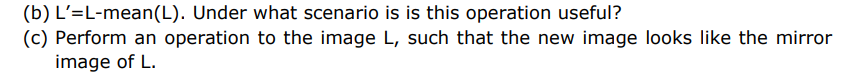

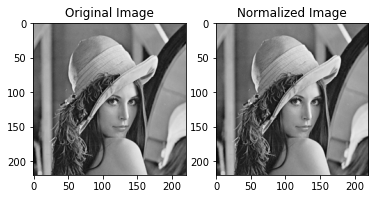

In [108]:
# Question (b)

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
img = Image.open('image_2.png')

# Convert the image to grayscale
img = img.convert('L')

# Convert the image to a NumPy array
img_array = np.array(img)

# Calculate the mean of the image
mean = np.mean(img_array)

# Subtract the mean from the image
img_normalized = img_array - mean

# Display the original and normalized images using Matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(img_normalized, cmap='gray')
ax2.set_title('Normalized Image')
plt.show()


In [11]:
#Using cv2

import cv2
import numpy as np

# Load the image
img = cv2.imread('image_2.png', cv2.IMREAD_GRAYSCALE)

# Calculate the mean of the image
mean = np.mean(img)

# Subtract the mean from the image
img_normalized = img - mean

# Display the original and normalized images
cv2.imshow('Original Image', img)
cv2.imshow('Normalized Image', img_normalized)
cv2.waitKey(0)    
cv2.destroyAllWindows()
# fig, (ax1, ax2) = plt.subplots(1, 2)
# ax1.imshow(img,cmap="gray")
# ax1.set_title("Original Image")
# ax2.imshow(img_normalized,cmap="gray")
# ax2.set_title("Normalized Image")
# plt.show()

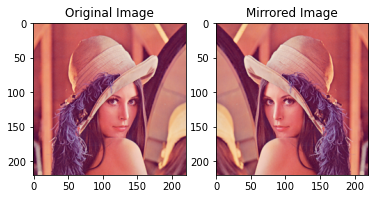

In [8]:
# Question (c) 

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
img = Image.open('image_2.png')

# Convert the image to a numpy array
img_array = np.array(img)

# Flip the image horizontally
img_mirror = np.fliplr(img_array)

# Display the original and mirrored images using Matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(img_mirror, cmap='gray')
ax2.set_title('Mirrored Image')
plt.show()


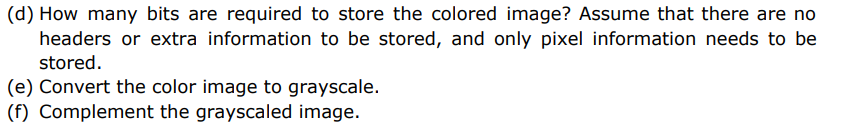

### Question (d) 
<font color='Blue'>Assuming that the image is in RGB format with 8 bits per color channel (i.e., 256 possible values per channel), then each pixel would require 8 bits x 3 color channels = 24 bits.</font>

<font color='Blue'>If the image has a resolution of W pixels wide by H pixels high, then the total number of pixels in the image would be W x H.
Therefore, the total number of bits required to store the entire image would be: (W x H) x 24 bits </font>

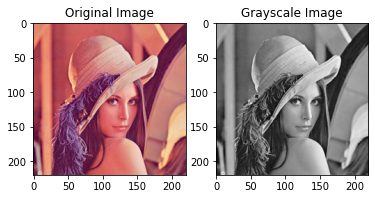

In [9]:
# Question (e)

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
img = Image.open('image_2.png')

# Convert the image to a numpy array
img_array = np.array(img)

# Convert the image to grayscale using the average method
gray = np.mean(img_array, axis=2)

# Display the original and grayscale images using Matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img)
ax1.set_title('Original Image')
ax2.imshow(gray, cmap='gray')
ax2.set_title('Grayscale Image')
plt.show()


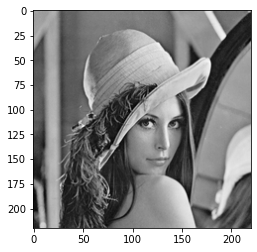

In [18]:
## Using Library 
from PIL import Image

# Open the color image file
img = Image.open('image_2.png')

# Convert the image to grayscale
gray = img.convert('L')

# Save the grayscale image
plt.imshow(gray,cmap='gray')   ## here cmap = "gray" to use  a grayscale colormap 

# Display the grayscale image
plt.show()



 ### Question (f)
 <font color='Blue'>The complement of an image is created by subtracting the grayscale value of each pixel from the maximum  grayscale value (which is typically 255 for an 8-bit grayscale image). This results in an image with inverted intensity values, where lighter pixels become darker and vice versa. The complement of an image is also sometimes referred to as its negative</font>

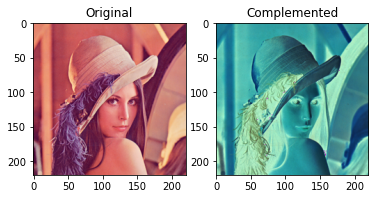

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
img_gray = plt.imread('image_2.png')

# Compute the complemented image
img_complemented = 255 - img_gray

# Display the original and complemented images side by side
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img_gray, cmap='gray')
ax1.set_title('Original')
ax2.imshow((img_complemented*255).astype('uint8'), cmap='gray')  ## Scalling by multiplying 255 then cast the image to np.uint8 
ax2.set_title('Complemented')
plt.show()


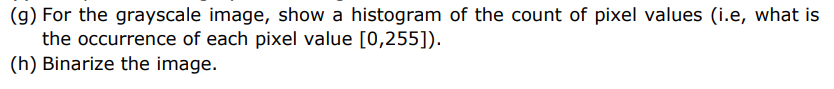

In [ ]:
# Question (g) 
## Using opencv 
impath = "image_2.png"
img = cv2.imread(imgpath,0)

plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.title('image')

plt.subplot(1,2,2)
plt.hist(img.ravel(),256,[0,255])
plt.title('histogram')

plt.show()

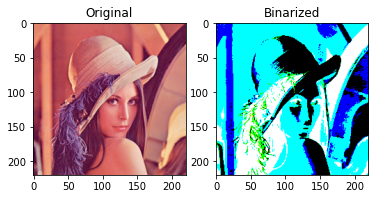

In [107]:
## Question (h)

# Load the grayscale image
img_gray_1 = plt.imread('image_2.png')
img_gray = img_gray_1*255

# Set a threshold value
threshold = 127

# Binarize the image
img_binary = np.where(img_gray >= threshold, 0,255)

# Display the original and binary images side by side
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img_gray_1, cmap='gray')
ax1.set_title('Original')
ax2.imshow(img_binary,cmap='gray')
ax2.set_title('Binarized')
plt.show()


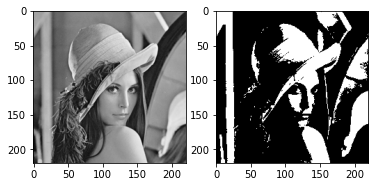

In [164]:
# Using CV2

Img = cv2.imread('image_2.png',0)  # 2nd argument 1 = loads color image , 0 = grayscale image , -1 = load image as such including alpha channel 
thres= 160
BinaryImg = Img.copy()
BinaryImg[Img>=thres] = 255
BinaryImg[Img<thres] = 0
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Img,cmap="gray")
ax2.imshow(BinaryImg,cmap="gray")
plt.show()

C:\Users\Aritra Roy\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


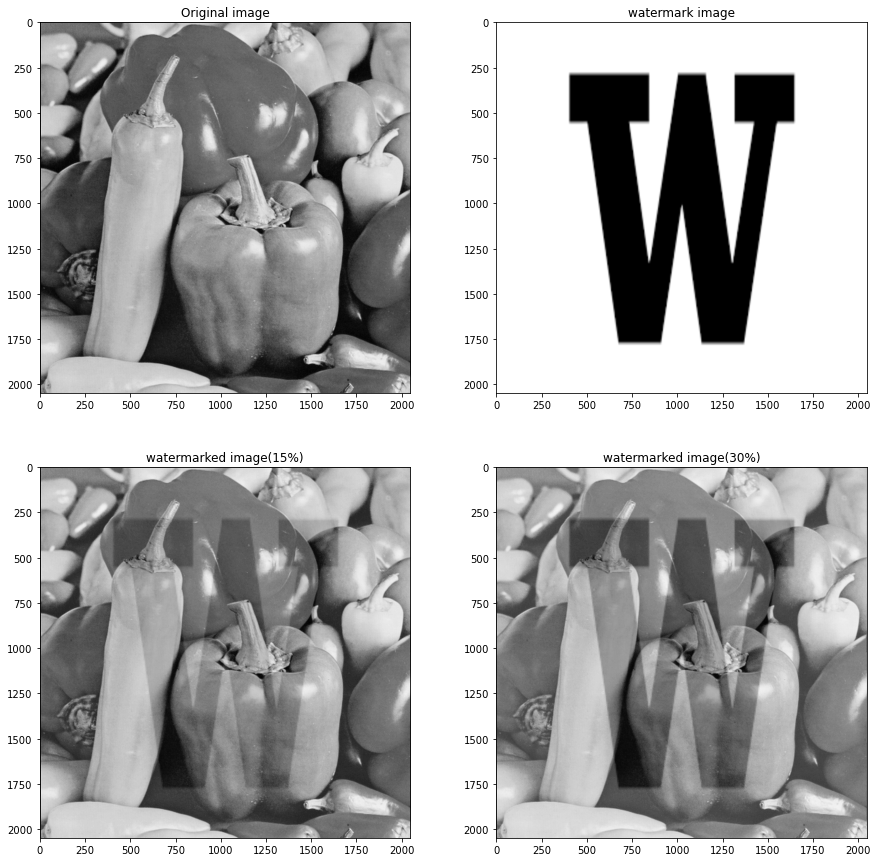

In [12]:
import cv2
import numpy as np
import pywt

# Load the original image and the watermark image
img = cv2.imread('image_3.png', cv2.IMREAD_GRAYSCALE)
watermark = cv2.imread('watermark.png', cv2.IMREAD_GRAYSCALE)

# # Resize the watermark image to match the size of the original image
watermark = cv2.resize(watermark, (img.shape[1], img.shape[0]))

# Create a copy of the original image
img_copy = np.copy(img)

# Calculate the position to paste the watermark in the middle of the image
watermark_pos = ((img_copy.shape[1] - watermark.shape[1]) // 2,
                 (img_copy.shape[0] - watermark.shape[0]) // 2)

# Paste the watermark in the middle of the copied image
img_copy[watermark_pos[1]:watermark_pos[1]+watermark.shape[0],
         watermark_pos[0]:watermark_pos[0]+watermark.shape[1]] = watermark

# Apply DWT to the original image and the watermarked image
coeffs = pywt.dwt2(img, 'haar')
watermark_coeffs = pywt.dwt2(img_copy, 'haar')

# Extract the approximation and detail coefficients from the original image
cA, (cH, cV, cD) = coeffs

# Extract the approximation coefficient from the watermarked image
cA_wm, _ = watermark_coeffs

# Embed the watermark by adding the approximation coefficients of the watermark to the original image
alpha_1, alpha_2 = 0.15 , 0.3  # Scaling factor for the watermark
cA_wm_embedded_1 = cA + alpha_1*cA_wm
cA_wm_embedded_2 = cA + alpha_2*cA_wm

# Perform IDWT on the watermarked image
watermarked_coeffs_1 = (cA_wm_embedded_1, (cH, cV, cD))
watermarked_img_1 = pywt.idwt2(watermarked_coeffs_1, 'haar')

watermarked_coeffs_2 = (cA_wm_embedded_2, (cH, cV, cD))
watermarked_img_2 = pywt.idwt2(watermarked_coeffs_2, 'haar')


# plotting the image 
fig, ax = plt.subplots(2, 2, figsize=(15,15))
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title("Original image")

ax[0,1].imshow(watermark, cmap='gray')
ax[0,1].set_title("watermark image")

ax[1,0].imshow(watermarked_img_1, cmap='gray')
ax[1,0].set_title("watermarked image(15%)")

ax[1,1].imshow(watermarked_img_2, cmap='gray')
ax[1,1].set_title("watermarked image(30%)")

plt.show();
